# Project 4 : Regression Analysis

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.feature_selection import mutual_info_regression
import random

random.seed(42)

## Dataset 1

## Dataset 2: Boston Housing Dataset

In [182]:
housing_df = pd.read_csv("housing_data.csv", names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### 2(a)

In [183]:
housing_df_train_X = housing_df.drop(['MEDV'], axis=1)
housing_df_train_X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [184]:
housing_df_train_Y = housing_df[['MEDV']]
housing_df_train_Y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [185]:
housing_df_train_X = np.array(housing_df_train_X)
housing_df_train_Y = np.array(housing_df_train_Y)
mod = sm.OLS(housing_df_train_Y, housing_df_train_X)    # Describe model
res = mod.fit()       # Fit model
print(res.summary()) 

#Variable with high P value is not significant

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     891.3
Date:                Sat, 02 Mar 2019   Prob (F-statistic):               0.00
Time:                        12:15:14   Log-Likelihood:                -1523.8
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     493   BIC:                             3128.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0929      0.034     -2.699      0.0

In [186]:
def TenFoldCV(model, train_X, train_Y):
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    kf.get_n_splits(train_X)
    
    training_rmse = list()
    testing_rmse = list()
    for train_index, test_index in kf.split(train_X):
        model.fit(train_X[train_index],train_Y[train_index])
        #training rmse
        predicted_Y = model.predict(train_X[train_index])
        training_rmse.append(np.sqrt(mean_squared_error(predicted_Y, train_Y[train_index])))
        #testing rmse
        predicted_Y = model.predict(train_X[test_index])
        testing_rmse.append(np.sqrt(mean_squared_error(predicted_Y, train_Y[test_index])))
    print("Average training RMSE: ", np.average(training_rmse))
    print("Average testing RMSE: ", np.average(testing_rmse))
    return training_rmse, testing_rmse

In [187]:
def drawScatterPlots(train_Y, predicted_Y):
    fig, ax = plt.subplots()
    ax.scatter(x=train_Y, y= predicted_Y)
    ax.plot([train_Y.min(), train_Y.max()], [train_Y.min(), train_Y.max()],  'k--', lw=3)
    ax.set_xlabel('True values')
    ax.set_ylabel('Fitted values')
    plt.show()


    residual_Y = train_Y - predicted_Y
    fig, ax = plt.subplots()
    ax.scatter(predicted_Y, residual_Y)
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residual')
    plt.show()

Average training RMSE:  4.670454144364911
Average testing RMSE:  4.7929925360045855
[[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
  -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
   3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
  -5.24758378e-01]]


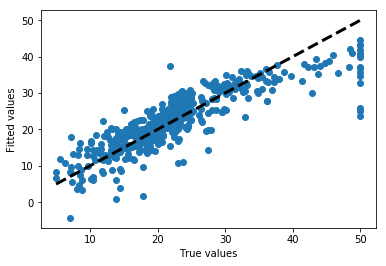

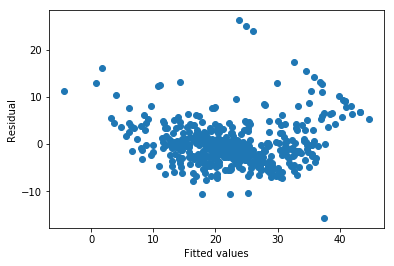

In [188]:
reg = LinearRegression(normalize=True)
TenFoldCV(reg,housing_df_train_X, housing_df_train_Y )

reg.fit(housing_df_train_X,housing_df_train_Y)
housing_df_predicted_Y = reg.predict(housing_df_train_X)
print(reg.coef_)

drawScatterPlots(housing_df_train_Y,housing_df_predicted_Y )

In [189]:
# Ridge regression
Alpha = [1,0.1,0.01,0.001]

rmse_for_Alpha = list()
for alpha in Alpha:
    ridge = Ridge(normalize=True, alpha = alpha)
    print("alpha: " + str(alpha))
    _ , testing_rmse = TenFoldCV(ridge, housing_df_train_X, housing_df_train_Y)
    rmse_for_Alpha.append(np.average(testing_rmse))

print ("----------")

best_alpha = Alpha[np.argmin(rmse_for_Alpha)]
ridge = RidgeCV(normalize=True,alphas= [best_alpha], cv=10)
ridge.fit(housing_df_train_X, housing_df_train_Y)
housing_df_predicted_Y = ridge.predict(housing_df_train_X)
print(ridge.coef_)

print ("Best Alpha value for Ridge Regression : " + str(best_alpha))
print ('Best RMSE for corresponding Alpha =', np.sqrt(mean_squared_error(housing_df_train_Y, housing_df_predicted_Y)))


alpha: 1
Average training RMSE:  5.545176844466782
Average testing RMSE:  5.579532934486909
alpha: 0.1
Average training RMSE:  4.751909135062023
Average testing RMSE:  4.842625212247374
alpha: 0.01
Average training RMSE:  4.672847000708183
Average testing RMSE:  4.790628723005426
alpha: 0.001
Average training RMSE:  4.670483185518561
Average testing RMSE:  4.792508850868982
----------
[[-1.03542237e-01  4.34058197e-02  5.19960647e-03  2.74630656e+00
  -1.66255959e+01  3.86518807e+00 -3.41085552e-04 -1.41355030e+00
   2.69158524e-01 -1.05767047e-02 -9.34595971e-01  9.28758725e-03
  -5.15910557e-01]]
Best Alpha value for Ridge Regression : 0.01
Best RMSE for corresponding Alpha = 4.681570246920186


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [190]:
# Lasso Regression

Alpha = [1,0.1,0.01,0.001,0.0005, 0.0001]

rmse_for_Alpha = list()
for alpha in Alpha:
    lasso = Lasso(normalize=True, alpha = alpha)
    print("alpha: " + str(alpha))
    _ , testing_rmse = TenFoldCV(lasso, housing_df_train_X, housing_df_train_Y)
    rmse_for_Alpha.append(np.average(testing_rmse))

print ("----------")

best_alpha = Alpha[np.argmin(rmse_for_Alpha)]
lasso = LassoCV(normalize=True, alphas = [best_alpha], cv=10)
lasso.fit(housing_df_train_X,housing_df_train_Y)
housing_df_predicted_Y = lasso.predict(housing_df_train_X)
print(lasso.coef_)

print ("Best Alpha value for Lasso Regularization : " + str(best_alpha))
print ('Best RMSE for corresponding Alpha =', np.sqrt(mean_squared_error(housing_df_train_Y, housing_df_predicted_Y)))

alpha: 1
Average training RMSE:  9.187066923162694
Average testing RMSE:  9.175068056880152
alpha: 0.1
Average training RMSE:  5.8631153265534115
Average testing RMSE:  5.8899258054840615
alpha: 0.01
Average training RMSE:  4.8473396474252475
Average testing RMSE:  4.955764682248477
alpha: 0.001
Average training RMSE:  4.673439627316392
Average testing RMSE:  4.787186640815802
alpha: 0.0005
Average training RMSE:  4.671258450235468
Average testing RMSE:  4.789598782525104
alpha: 0.0001
Average training RMSE:  4.6704879302046765
Average testing RMSE:  4.792236760244802
----------
[-1.00549239e-01  4.23750555e-02  0.00000000e+00  2.69026297e+00
 -1.65258561e+01  3.85232711e+00 -0.00000000e+00 -1.41597570e+00
  2.63004585e-01 -1.02547310e-02 -9.33489599e-01  9.08023522e-03
 -5.22501984e-01]
Best Alpha value for Lasso Regularization : 0.001
Best RMSE for corresponding Alpha = 4.682152165446494


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Dataset 3

In [191]:
insurance_df = pd.read_csv("insurance_data.csv")
insurance_df_categroical = insurance_df.select_dtypes(include=[object])
insurance_df_categroical.head()

,ft4,ft5,ft6
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [192]:
# 1. INSTANTIATE
enc = OneHotEncoder()
# 2. FIT
enc.fit(insurance_df_categroical)
# 3. Transform
one_hot_labels = enc.transform(insurance_df_categroical).toarray()

In [193]:
insurance_df_train_Y = np.array(insurance_df['charges'])
insurance_df_numerical = np.array(insurance_df[['ft1', 'ft2', 'ft3']])
insurance_df_train_X = np.concatenate((insurance_df_numerical, one_hot_labels), axis=1)

Average training RMSE:  6040.352471670377
Average testing RMSE:  6066.1961592429025


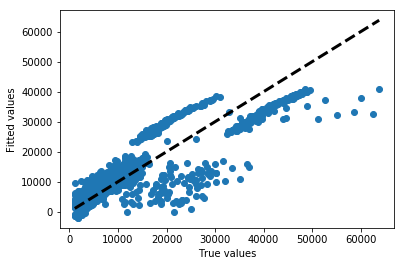

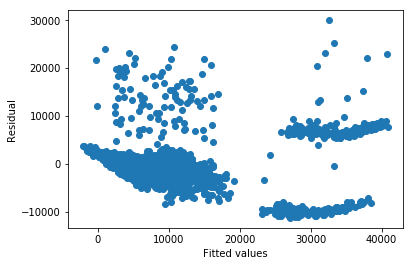

In [194]:
reg = LinearRegression(normalize=True)

TenFoldCV(reg,insurance_df_train_X, insurance_df_train_Y )

reg.fit(insurance_df_train_X,insurance_df_train_Y)
insurance_df_predicted_Y = reg.predict(insurance_df_train_X)

drawScatterPlots(insurance_df_train_Y,insurance_df_predicted_Y )

Average training RMSE:  6040.884853215843
Average testing RMSE:  6072.56145214846


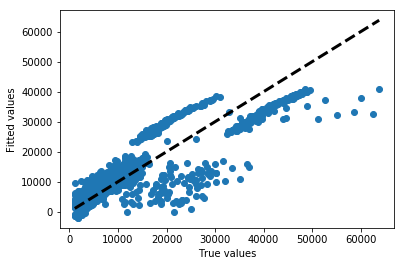

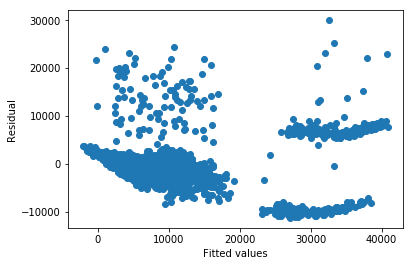

In [195]:
scaler = StandardScaler()
standard_numerical = scaler.fit_transform(insurance_df_numerical)

insurance_df_train_X = np.concatenate((standard_numerical, one_hot_labels), axis=1)
reg = LinearRegression(normalize=True)

TenFoldCV(reg,insurance_df_train_X, insurance_df_train_Y )

reg.fit(insurance_df_train_X,insurance_df_train_Y)
insurance_df_predicted_Y = reg.predict(insurance_df_train_X)

drawScatterPlots(insurance_df_train_Y,insurance_df_predicted_Y )

Average training RMSE:  6199.837835214862
Average testing RMSE:  6226.071276987422


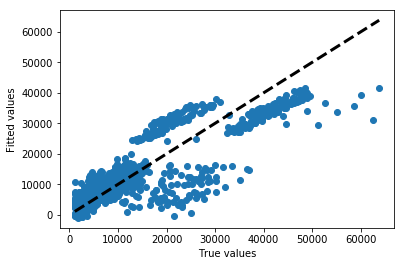

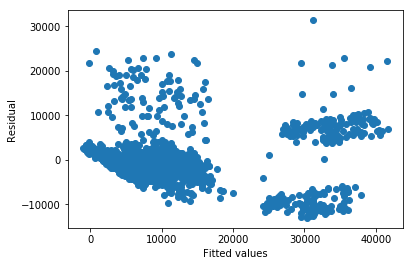

In [196]:
insurance_df_ft1 = np.array(insurance_df['ft1'])
insurance_df_ft2_ft3 = np.array(insurance_df[['ft2', 'ft3']])
new_ft1 = list()

for val in insurance_df_ft1:
    if val < 30:
        new_ft1.append([1])
    elif val > 50:
        new_ft1.append([3])
    else:
        new_ft1.append([2])
        
standard_ft2_ft3 = scaler.fit_transform(insurance_df_ft2_ft3)
        
insurance_df_train_X = np.concatenate((new_ft1,standard_ft2_ft3, one_hot_labels), axis=1)
reg = LinearRegression(normalize=True)

TenFoldCV(reg,insurance_df_train_X, insurance_df_train_Y )

reg.fit(insurance_df_train_X,insurance_df_train_Y)
insurance_df_predicted_Y = reg.predict(insurance_df_train_X)

drawScatterPlots(insurance_df_train_Y,insurance_df_predicted_Y )

In [197]:
le = LabelEncoder()

ft4 = np.array(insurance_df_categroical['ft4'])
ft5 = np.array(insurance_df_categroical['ft5'])
ft6 = np.array(insurance_df_categroical['ft6'])
new_ft4 = le.fit_transform(ft4)
new_ft5 = le.fit_transform(ft5)
new_ft6 = le.fit_transform(ft6)

new_ft4 = np.reshape(new_ft4, (length,1))
new_ft5 = np.reshape(new_ft5, (length,1))
new_ft6 = np.reshape(new_ft6, (length,1))

insurance_df_train_X = np.concatenate((insurance_df_numerical,new_ft4, new_ft5, new_ft6), axis=1)
# numerical_labels = le.transform(insurance_df_categroical).toarray()